In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_cleaner import cleaner

In [2]:
data = pd.read_csv("./data/alcohol-consumption.csv")
data = cleaner(data)
data.head(44)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage
0,Albania,7.5,5.0,2.5,34.3,26.5,37.6,1.7
1,Andorra,11.3,10.1,1.6,34.1,42.0,23.9,0.0
2,Armenia,5.5,3.8,1.7,10.6,7.0,82.3,0.1
3,Austria,11.6,11.4,0.4,53.5,31.6,14.9,0.0
4,Belarus,11.2,9.6,1.5,22.8,2.2,49.0,26.0
5,Belgium,12.1,10.4,1.0,44.4,38.3,14.2,3.1
6,Bosnia and Herzegovina,6.4,4.4,1.8,75.8,8.6,12.4,3.2
7,Bulgaria,12.7,11.4,1.3,38.8,17.2,42.9,1.2
8,Croatia,8.9,9.9,1.4,44.5,39.0,13.0,3.5
9,Cyprus,10.8,9.6,1.8,29.7,28.4,41.9,0.0


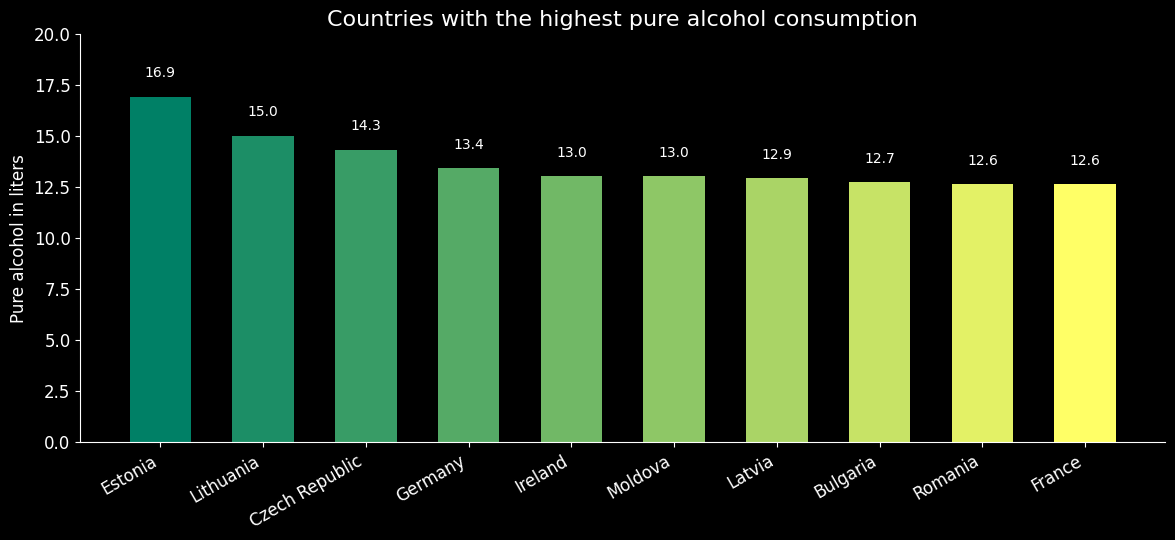

In [76]:
sorted_by_alcohol_high = data.sort_values(by='total_consumption', ascending=False)
x = sorted_by_alcohol_high['country'].head(10)
y = sorted_by_alcohol_high['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 20))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 1, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the highest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

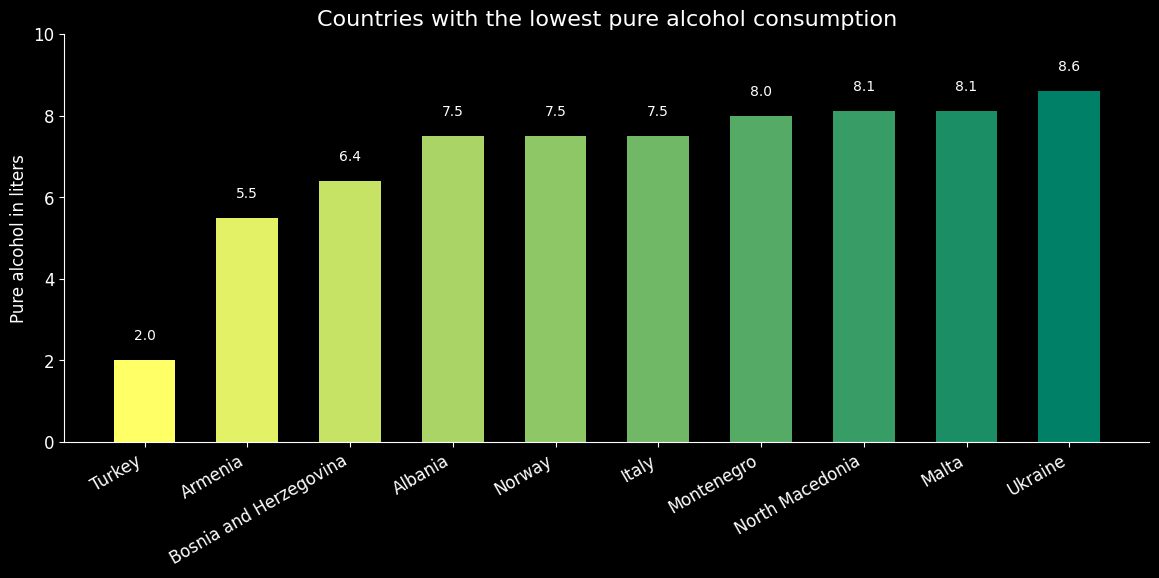

In [74]:
sorted_by_alcohol_low = data.sort_values(by='total_consumption')
x = sorted_by_alcohol_low['country'].head(10)
y = sorted_by_alcohol_low['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 10))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 0.5, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the lowest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

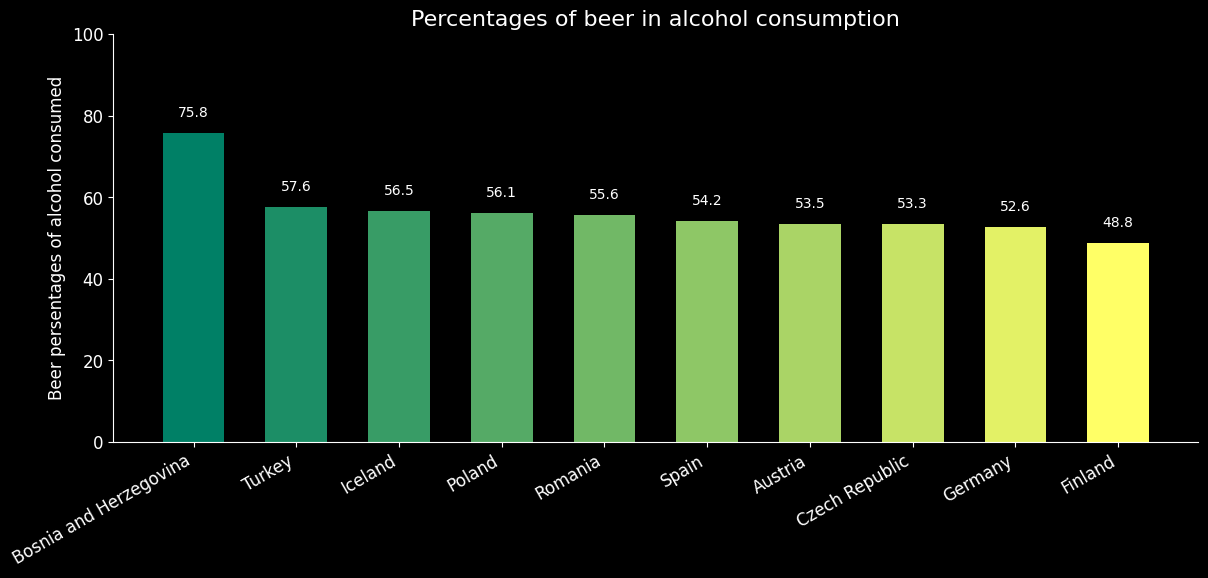

In [83]:
sorted_by_beer = data.sort_values(by='beer_percentage', ascending=False)
x = sorted_by_beer['country'].head(10)
y = sorted_by_beer['beer_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}", ha="center", va="center")

ax.set_title("Percentages of beer in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Beer persentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()